In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.preprocessing import OneHotEncoder

In [2]:
modulo_1 = pd.read_stata('../TF/01_MÓDULO.dta')
modulo_2 = pd.read_stata('../TF/02_MÓDULO.dta')
modulo_3 = pd.read_stata('../TF/03_MÓDULO.dta')
modulo_4 = pd.read_stata('../TF/04_MÓDULO.dta')
modulo_5 = pd.read_stata('../TF/05_MÓDULO.dta')
modulo_6 = pd.read_stata('../TF/06_MÓDULO.dta')
modulo_7 = pd.read_stata('../TF/07_MÓDULO.dta')
modulo_8 = pd.read_stata('../TF/08_MÓDULO.dta')
modulo_9 = pd.read_stata('../TF/09_MÓDULO.dta')

In [3]:
modulo_1 = modulo_1[['IRUC','DEPARTAMENTO','PROVINCIA','DISTRITO','C4','C20','C1RESULTFINAL','C10','C11','C12','C13A','C14','C16','C17']]
modulo_2 = modulo_2[['IRUC','DEPARTAMENTO','PROVINCIA','DISTRITO','C4','C20','C1RESULTFINAL','M1P3','M1P4','M1P5','M1P8','M1P10','M1P13','M3P1_1','M3P1_1D','M3P1_2','M3P1_2D','M3P1_3','M3P1_3D','M3P10_1','M3P10_2','M3P10_3','M3P10_4','M3P10_5','M3P13','M3P17']]
modulo_3 = modulo_3[['IRUC','DEPARTAMENTO','PROVINCIA','DISTRITO','C4','C20','C1RESULTFINAL','M4P1','M4P3','M4P7_1','M4P7_2','M4P7_4','M4P8','M4P13_1','M4P13_2','M4P13_4','M4P23','M4P24_1','M4P24_2','M4P31','M4P34','M4P35','M4P36_1','M4P36_2','M4P36_3','M4P37','M4P38_1A','M4P41','M4P46','M4P47','M4P49','M4P53','M4P64','M4P65','M4P66','M4P68','M4P84']]
modulo_4 = modulo_4[['IRUC','DEPARTAMENTO','PROVINCIA','DISTRITO','C4','C20','C1RESULTFINAL','M5P1_1A','M5P1_1B','M5P1_2A','M5P1_2B','M5P1_4A','M5P1_4B','M5P1_5A','M5P1_5B','M5P3_1','M5P3_2','M5P3_3','M5P3_4','M5P3_5','M5P3_6','M5P5_1','M5P5_2','M6P1_1','M6P1_2','M6P1_3','M6P4_1','M6P4_2','M6P5_1','M6P5_2','M6P5_3','M6P5_4','M6P8']]
modulo_5 = modulo_5[['IRUC','DEPARTAMENTO','PROVINCIA','DISTRITO','C4','C20','C1RESULTFINAL','M7P1_1B','M7P1_1C','M7P1_2B','M7P1_2C','M7P1_3B','M7P1_3C','M7P5_1','M7P5_2','M7P5_3','M7P8_1','M7P8_2','M7P8_3','M7P8_4','M7P8_5','M7P8_6','M7P8_7','M7P8_8','M7P9','M7P10','M8P27','M8P28','M8P29','M8P30','M8P53_1','M8P53_2','M8P53_3','M8P53_5','M8P53_6','M8P53_11','M8P53_12','M8P53_14','M8P53_17','M8P53_20','M9P4_1','M9P4_2','M9P4_3','M9P4_4','M9P4_5','M9P4_6','M9P4_7']]

In [4]:
credito_df = modulo_1.merge(modulo_2, how='left',on=['IRUC','DEPARTAMENTO','PROVINCIA','DISTRITO','C4','C20','C1RESULTFINAL'])
credito_df = credito_df.merge(modulo_3,how='left',on=['IRUC','DEPARTAMENTO','PROVINCIA','DISTRITO','C4','C20','C1RESULTFINAL'])
credito_df = credito_df.merge(modulo_4,how='left',on=['IRUC','DEPARTAMENTO','PROVINCIA','DISTRITO','C4','C20','C1RESULTFINAL'])
credito_df = credito_df.merge(modulo_5,how='left',on=['IRUC','DEPARTAMENTO','PROVINCIA','DISTRITO','C4','C20','C1RESULTFINAL'])

In [5]:
# Quiero ver las cantidades exactas de los que terminaron la encuesta para quedarme con solo esos datos y evitar sesgos
conteo_valores = credito_df['C1RESULTFINAL'].value_counts()

# Muestra las cantidades exactas
for valor, cantidad in conteo_valores.items():
    print(f'{valor}: {cantidad}')


Completo: 14226
No Ubicada: 1767
Otro: 1422
Ausente: 1364
Rechazo: 258
Incompleta: 138
Act No investigada: 29


In [6]:
# Sobrescribir el DataFrame original con solo las filas donde 'C1RESULTFINAL' es 'Completo'
credito_df = credito_df.loc[credito_df['C1RESULTFINAL'] == 'Completo']

In [7]:
credito_df.rename(columns={'C4': 'anio_fun'}, inplace=True)
credito_df.rename(columns={'C20': 'rango_ventas'}, inplace=True)
credito_df.rename(columns={'C10': 'sexo'}, inplace=True)
credito_df.rename(columns={'C11': 'edad'}, inplace=True)
credito_df.rename(columns={'C12': 'estudios'}, inplace=True)
credito_df.rename(columns={'C13A': 'cargo'}, inplace=True)
credito_df.rename(columns={'C14': 'act_eco'}, inplace=True)
credito_df.rename(columns={'C16': 'organizacion'}, inplace=True)
credito_df.rename(columns={'C17': 'uso_de_local'}, inplace=True)

credito_df.rename(columns={'M1P3': 'credito_inicial'}, inplace=True)
credito_df.rename(columns={'M1P4': 'tipo_acredor'}, inplace=True)
credito_df.rename(columns={'M1P5': 'areas_funcionales'}, inplace=True)
credito_df.rename(columns={'M1P8': 'mercado'}, inplace=True)
credito_df.rename(columns={'M1P10': 'competencia'}, inplace=True)
credito_df.rename(columns={'M1P13': 'org_empresarial'}, inplace=True)
credito_df.rename(columns={'M3P1_1': 'hay_ejecutivos'}, inplace=True)
credito_df.rename(columns={'M3P1_1D': 'sal_ejec'}, inplace=True)
credito_df.rename(columns={'M3P1_2': 'emple_per'}, inplace=True)
credito_df.rename(columns={'M3P1_2D': 'sal_emple'}, inplace=True)
credito_df.rename(columns={'M3P1_3': 'obreros_perma'}, inplace=True)
credito_df.rename(columns={'M3P1_3D': 'sal_obr_per'}, inplace=True)
credito_df.rename(columns={'M3P10_1': 'innov_tec'}, inplace=True)
credito_df.rename(columns={'M3P10_2': 'estacionalidad'}, inplace=True)
credito_df.rename(columns={'M3P10_3': 'renuncia_personal'}, inplace=True)
credito_df.rename(columns={'M3P10_4': 'apertura_negocio'}, inplace=True)
credito_df.rename(columns={'M3P10_5': 'expansion_empresa'}, inplace=True)
credito_df.rename(columns={'M3P13': 'dificul_contr_empl'}, inplace=True)
credito_df.rename(columns={'M3P17': 'capacidad_tec_requeri'}, inplace=True)

credito_df.rename(columns={'M4P1': 'modalidad_compra'}, inplace=True)
credito_df.rename(columns={'M4P3': 'tipo_regist_decompr'}, inplace=True)
credito_df.rename(columns={'M4P7_1': 'pago_adelantado_nac'}, inplace=True)
credito_df.rename(columns={'M4P7_2': 'pago_contraentreg_nac'}, inplace=True)
credito_df.rename(columns={'M4P7_4': 'pago_plazo_instrumfin_nac'}, inplace=True)
credito_df.rename(columns={'M4P8': 'compr_intern'}, inplace=True)
credito_df.rename(columns={'M4P13_1': 'pago_adelt_int'}, inplace=True)
credito_df.rename(columns={'M4P13_2': 'pago_contraentre_int'}, inplace=True)
credito_df.rename(columns={'M4P13_4': 'pago_plazo_instrumfin_int'}, inplace=True)
credito_df.rename(columns={'M4P23': 'almaceno_prod_insu_merc'}, inplace=True)
credito_df.rename(columns={'M4P24_1': 'almaceno_casa_vivienda'}, inplace=True)
credito_df.rename(columns={'M4P24_2': 'almaceno_empresa'}, inplace=True)
credito_df.rename(columns={'M4P31': 'tecnolg_utilizada_prod'}, inplace=True)
credito_df.rename(columns={'M4P34': 'factores_de_producc'}, inplace=True)
credito_df.rename(columns={'M4P35': 'contrato_otras_empr'}, inplace=True)
credito_df.rename(columns={'M4P36_1': 'reposicion_de_equip_anti'}, inplace=True)
credito_df.rename(columns={'M4P36_2': 'mejoras_equipo'}, inplace=True)
credito_df.rename(columns={'M4P36_3': 'expansion_capacidad_prod'}, inplace=True)
credito_df.rename(columns={'M4P37': 'frecuencia_mantenimiento'}, inplace=True)
credito_df.rename(columns={'M4P38_1A': 'recicla'}, inplace=True)
credito_df.rename(columns={'M4P41': 'sistem_refrigeracion'}, inplace=True)
credito_df.rename(columns={'M4P46': 'principal_modalid_venta'}, inplace=True)
credito_df.rename(columns={'M4P47': 'estud_mercad'}, inplace=True)
credito_df.rename(columns={'M4P49': 'promocion_comerc'}, inplace=True)
credito_df.rename(columns={'M4P53': 'realiza_vents_inter'}, inplace=True)
credito_df.rename(columns={'M4P64': 'como_lleva_contavilidad'}, inplace=True)
credito_df.rename(columns={'M4P65': 'conoce_tributos'}, inplace=True)
credito_df.rename(columns={'M4P66': 'benef_trib'}, inplace=True)
credito_df.rename(columns={'M4P68': 'difict_pago_inpuest'}, inplace=True)
credito_df.rename(columns={'M4P84': 'cetificado'}, inplace=True)

credito_df.rename(columns={'M5P1_1A': 'pc'}, inplace=True)
credito_df.rename(columns={'M5P1_1B': 'pc_cantidad'}, inplace=True)
credito_df.rename(columns={'M5P1_2A': 'laptop_table'}, inplace=True)
credito_df.rename(columns={'M5P1_2B': 'laptop_tablec_cantidad'}, inplace=True)
credito_df.rename(columns={'M5P1_4A': 'impresora'}, inplace=True)
credito_df.rename(columns={'M5P1_4B': 'impresora_cantidad'}, inplace=True)
credito_df.rename(columns={'M5P1_5A': 'escaner'}, inplace=True)
credito_df.rename(columns={'M5P1_5B': 'escaner_cantidad'}, inplace=True)
credito_df.rename(columns={'M5P3_1': 'sofware_contrable'}, inplace=True)
credito_df.rename(columns={'M5P3_2': 'sofware_ventas'}, inplace=True)
credito_df.rename(columns={'M5P3_3': 'sofware_personal'}, inplace=True)
credito_df.rename(columns={'M5P3_4': 'sofware_finanzas'}, inplace=True)
credito_df.rename(columns={'M5P3_5': 'sofware_logistica'}, inplace=True)
credito_df.rename(columns={'M5P3_6': 'sofware_produccion'}, inplace=True)
credito_df.rename(columns={'M5P5_1': 'internet'}, inplace=True)
credito_df.rename(columns={'M5P5_2': 'intranet'}, inplace=True)
credito_df.rename(columns={'M6P1_1': 'robo'}, inplace=True)
credito_df.rename(columns={'M6P1_2': 'intento_robo'}, inplace=True)
credito_df.rename(columns={'M6P1_3': 'extorcion'}, inplace=True)
credito_df.rename(columns={'M6P4_1': 'perdida_humana'}, inplace=True)
credito_df.rename(columns={'M6P4_2': 'perdida_activos'}, inplace=True)
credito_df.rename(columns={'M6P5_1': 'seguridad_infraest'}, inplace=True)
credito_df.rename(columns={'M6P5_2': 'seguridad_video'}, inplace=True)
credito_df.rename(columns={'M6P5_3': 'seguridad_sist_control_pers'}, inplace=True)
credito_df.rename(columns={'M6P5_4': 'seguridad_alarma'}, inplace=True)
credito_df.rename(columns={'M6P8': 'transporte_vehiculos_propios'}, inplace=True)

credito_df.rename(columns={'M7P1_1B': 'credito_capital_solicito'}, inplace=True)
credito_df.rename(columns={'M7P1_1C': 'credito_capital_utilizo'}, inplace=True)
credito_df.rename(columns={'M7P1_2B': 'credito_actifijo_solicito'}, inplace=True)
credito_df.rename(columns={'M7P1_2C': 'credito_actifijo_utilizo'}, inplace=True)
credito_df.rename(columns={'M7P1_3B': 'credito_consumo_solicito'}, inplace=True)
credito_df.rename(columns={'M7P1_3C': 'credito_consumo_utilizo'}, inplace=True)
credito_df.rename(columns={'M7P2': 'utilizo_produc_fin'}, inplace=True)
credito_df.rename(columns={'M7P3': 'razon_porque_no_solicito_credit'}, inplace=True)


credito_df.rename(columns={'M7P5_1': 'credito_monto_soles'}, inplace=True)
credito_df.rename(columns={'M7P5_2': 'credito_cuota_mensual'}, inplace=True)
credito_df.rename(columns={'M7P5_3': 'credito_plazo'}, inplace=True)
credito_df.rename(columns={'M7P8_1': 'seguro_auto'}, inplace=True)
credito_df.rename(columns={'M7P8_2': 'seguro_incendio'}, inplace=True)
credito_df.rename(columns={'M7P8_3': 'seguro_robo'}, inplace=True)
credito_df.rename(columns={'M7P8_4': 'seguro_transporte_mercans'}, inplace=True)
credito_df.rename(columns={'M7P8_5': 'seguro_fraude'}, inplace=True)
credito_df.rename(columns={'M7P8_6': 'seguro_medico'}, inplace=True)
credito_df.rename(columns={'M7P8_7': 'seguro_vida'}, inplace=True)
credito_df.rename(columns={'M7P8_8': 'seguro_accidente'}, inplace=True)
credito_df.rename(columns={'M7P9': 'credito_prestamista_accedio'}, inplace=True)
credito_df.rename(columns={'M7P10': 'liquidez_problema'}, inplace=True)
credito_df.rename(columns={'M8P27': 'regimen_tributario'}, inplace=True)
credito_df.rename(columns={'M8P28': 'tributario__facil_dificil'}, inplace=True)
credito_df.rename(columns={'M8P29': 'tributosmun_facil_dificil'}, inplace=True)
credito_df.rename(columns={'M8P30': 'atendio_auditorias'}, inplace=True)
credito_df.rename(columns={'M8P53_1': 'dificultad_financiamiento'}, inplace=True)
credito_df.rename(columns={'M8P53_2': 'operaciones_no_automatizado'}, inplace=True)
credito_df.rename(columns={'M8P53_3': 'manodeobra_no_calif'}, inplace=True)
credito_df.rename(columns={'M8P53_5': 'poca_demanda'}, inplace=True)
credito_df.rename(columns={'M8P53_6': 'falta_insumo_nac'}, inplace=True)
credito_df.rename(columns={'M8P53_11': 'excesiva_regu_labo'}, inplace=True)
credito_df.rename(columns={'M8P53_12': 'excesiva_regu_tribu'}, inplace=True)
credito_df.rename(columns={'M8P53_14': 'excesiva_regu_licencia'}, inplace=True)
credito_df.rename(columns={'M8P53_17': 'corrupcion'}, inplace=True)
credito_df.rename(columns={'M8P53_20': 'informalidad'}, inplace=True)
credito_df.rename(columns={'M9P4_1': 'venta_mercaderia'}, inplace=True)
credito_df.rename(columns={'M9P4_2': 'costo_venta_merca'}, inplace=True)
credito_df.rename(columns={'M9P4_3': 'margen_comercial'}, inplace=True)
credito_df.rename(columns={'M9P4_4': 'ventas_pruductos'}, inplace=True)
credito_df.rename(columns={'M9P4_5': 'prestacion_servicios'}, inplace=True)
credito_df.rename(columns={'M9P4_6': 'otros_ingresos'}, inplace=True)
credito_df.rename(columns={'M9P4_7': 'total_ingreso'}, inplace=True)


In [8]:
credito_df['solicito_credito'] = credito_df[['credito_capital_solicito', 'credito_actifijo_solicito', 'credito_consumo_solicito']].apply(lambda row: 'Si' if 'Si' in row.values else 'No', axis=1)
datos_2 = credito_df[credito_df['solicito_credito'] == 'Si']
datos_3 = datos_2[datos_2['C1RESULTFINAL'] == 'Completo']

In [9]:
# Crear una función de mapeo para asignar 1 a "si" y 0 a "no"
def map_solicito_credito(valor):
    return 1 if valor == "Si" else 0

# Aplicar la función de mapeo para crear la nueva columna "outcome"
credito_df['outcome'] = credito_df['solicito_credito'].map(map_solicito_credito)

In [10]:
# Eliminar las columnas que de 'IRUC', 'DEPARTAMENTO', 'PROVINCIA', y 'DISTRITO' que solo nos interesaron para el merge
columnas_a_eliminar = ['IRUC', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO']

# Eliminar las columnas
credito_df = credito_df.drop(columnas_a_eliminar, axis=1)


In [11]:
# Convertir la variable "sexo" a dummy
credito_df['sexo_dummy'] = credito_df['sexo'].map({'Masculino': 1, 'Femenino': 0})

# Eliminar filas con valores NaN en la nueva variable dummy
credito_df = credito_df.dropna(subset=['sexo_dummy'])


In [12]:
# Eliminar la columna "sexo"
credito_df = credito_df.drop('sexo', axis=1)

In [13]:
# Convertir la variable "rango_ventas" a dummy
credito_df['rango_ventas_dummy'] = credito_df['rango_ventas'].map({'Hasta 570000 nuevos soles?': 1, 'Entre 570000 y 6460000 nuevos soles?': 2, 'Mayor a 6460000 nuevos soles?': 3})


In [14]:
# Eliminar la columna "rango_ventas" que era categórica
credito_df = credito_df.drop('rango_ventas', axis=1)

In [15]:
# Convertir la variable "C1RESULTFINAL" a dummy
#credito_df['C1RESULTFINAL_dummy'] = credito_df['C1RESULTFINAL'].map({'Completo': 1})

In [16]:
# Eliminar la columna "C1RESULTFINAL" que ya nos delimito la muestra
credito_df = credito_df.drop('C1RESULTFINAL', axis=1)

In [17]:
mapeo_estudio = {
    'Sin nivel': 1,
    'Inicial': 2,
    'Primaria incompleta': 3,
    'Primaria Completa': 4,
    'Secundaria incompleta': 5,
    'Secundaria completa': 6,
    'Superior no universitaria incompleta': 7,
    'Superior no universitaria completa': 8,
    'Superior universitaria incompleta': 9,
    'Superior universitaria completa': 10,
    'Post grado': 11
}


# Aplicar el mapeo a la columna "estudios"
credito_df['estudio_numerico'] = credito_df['estudios'].map(mapeo_estudio)


In [18]:
# Eliminar la columna original "estudio" categórica
credito_df = credito_df.drop('estudios', axis=1)

In [19]:
# Eliminar la columna "cargo" que solo contiene nulas
credito_df.drop('cargo', axis=1, inplace=True)

In [20]:
# Eliminar la columna "act_eco" porque contiene demasiadas categorías, se podría mejorar cambiando cada actividad por el sueldo promedio, pero requeriría de una amplia investigación
credito_df.drop('act_eco', axis=1, inplace=True)

In [21]:
#Ordenamos de 0 a 5 donde, miemtras meor sea el número es menos confiable en materia legal
mapeo_organizacion = {
    'Persona natural': 5,
    'Sociedad anónima abierta': 4,
    'Sociedad anónima cerrada': 3,
    'Sociedad comercial de responsabilidad limitada': 2,
    'Empresa individual de responsabilidad limitada': 1,
    'Otra': 0,
}


# Aplicar el mapeo a la columna "organizacion"
credito_df['organizacion_numerico'] = credito_df['organizacion'].map(mapeo_organizacion)

In [22]:
# Eliminar la columna original "organizacion" categórica
credito_df = credito_df.drop('organizacion', axis=1)

In [23]:
# si el accuracy no es bueno eliminar "organizacion_numerico" ya que no tiene significancia

In [24]:
mapeo_uso_de_local = {
    'No': 0,
    'Si': 1,
}

# Aplicar el mapeo a la columna "uso_de_local"
credito_df['uso_de_local_numerico'] = credito_df['uso_de_local'].map(mapeo_uso_de_local)

In [25]:
#eliminar categórica
credito_df = credito_df.drop('uso_de_local', axis=1)

In [26]:
#eliminar tipo_acredor, el objetivo es estudiar el crédito, sea de la organización que formal que provenga. La variable tipo_acredor esta compuesta mayormente por nulas
credito_df = credito_df.drop('tipo_acredor', axis=1)

In [27]:
#mapeo_credito_inicial = {
#    'No': 0,
#    'Si': 1,
#}

# Aplicar el mapeo a la columna "credito_inicial"
#credito_df['credito_inicial_numerico'] = credito_df['credito_inicial'].map(mapeo_credito_inicial)

In [28]:
credito_df = credito_df.drop('credito_inicial', axis=1)

In [29]:
mapeo_areas_funcionales = {
    'No': 0,
    'Si': 1,
}

# Aplicar el mapeo a la columna "areas_funcionales"
credito_df['areas_funcionales_numerico'] = credito_df['areas_funcionales'].map(mapeo_areas_funcionales)

In [30]:
credito_df = credito_df.drop('areas_funcionales', axis=1)

In [31]:
mapeo_mercado = {
    '¿Local?': 0,
    '¿Nacional?': 1,
    '¿Internacional?': 3
}

# Aplicar el mapeo a la columna "mercado"
credito_df['mercado_numerico'] = credito_df['mercado'].map(mapeo_mercado)

In [32]:
credito_df = credito_df.drop('mercado', axis=1)

In [33]:
mapeo_competencia = {
    'No sabe': 0,
    '¿Mucha competencia?': 1,
    '¿Poca competencia?': 2,
    '¿No hay competencia?': 3
}
 
# Aplicar el mapeo a la columna "competencia"
credito_df['competencia_numerico'] = credito_df['competencia'].map(mapeo_competencia)

In [34]:
credito_df = credito_df.drop('competencia', axis=1)

In [35]:
mapeo_org_empresarial = {
    'No': 0,
    'Si': 1,
}

# Aplicar el mapeo a la columna "org_empresarial"
credito_df['org_empresarial_numerico'] = credito_df['org_empresarial'].map(mapeo_org_empresarial)

In [36]:
credito_df = credito_df.drop('org_empresarial', axis=1)

In [37]:
# Calcula las cantidades exactas de hay_ejecutivos
conteo_valores1 = credito_df['hay_ejecutivos'].value_counts()

# Muestra las cantidades exactas
for valor, cantidad in conteo_valores1.items():
    print(f'{valor}: {cantidad}')


1.0: 14226


In [38]:
#como todos los valores de "hay_ejecutivos" son unos, podemos eliminar esta columna
credito_df = credito_df.drop('hay_ejecutivos', axis=1)

In [39]:
# Calculamos la media y la varianza de la columna 'sal_ejec'
media_salario = credito_df['sal_ejec'].mean()
varianza_salario = credito_df['sal_ejec'].var()

# Mostrar la media y la varianza
print(f'Media de sal_ejec: {media_salario}')
print(f'Varianza de sal_ejec: {varianza_salario}')


Media de sal_ejec: 9143.07573773794
Varianza de sal_ejec: 275353752.1749643


In [40]:
#Como la varianza es demasiado amplia, cambiaremos los valores nulos de "sal_ejec" con la mediana
mediana_salario = credito_df['sal_ejec'].median()
credito_df['sal_ejec'].fillna(mediana_salario, inplace=True)


In [41]:
# Calcula las cantidades exactas de hay_ejecutivos
conteo_valores2 = credito_df['emple_per'].value_counts()

# Muestra las cantidades exactas
for valor, cantidad in conteo_valores2.items():
    print(f'{valor}: {cantidad}')


1.0: 14226


In [42]:
#como todos los valores de "emple_per" son unos, podemos eliminar esta columna
credito_df = credito_df.drop('emple_per', axis=1)

In [43]:
# Calculamos la media y la varianza de la columna 'sal_emple'
media_salario = credito_df['sal_emple'].mean()
varianza_salario = credito_df['sal_emple'].var()

# Mostrar la media y la varianza
print(f'Media de sal_emple: {media_salario}')
print(f'Varianza de sal_emple: {varianza_salario}')


Media de sal_emple: 2871.4205016974724
Varianza de sal_emple: 80651249.8081659


In [44]:
#Como la varianza es demasiado amplia, cambiaremos los valores nulos de "sal_emple" con la mediana
mediana_salario = credito_df['sal_emple'].median()
credito_df['sal_emple'].fillna(mediana_salario, inplace=True)


In [45]:
#como todos los valores de "obreros_perma" son unos, podemos eliminar esta columna
credito_df = credito_df.drop('obreros_perma', axis=1)

In [46]:
# Calculamos la media y la varianza de la columna 'sal_obr_per'
media_salario = credito_df['sal_obr_per'].mean()
varianza_salario = credito_df['sal_obr_per'].var()

# Mostrar la media y la varianza
print(f'Media de sal_obr_per: {media_salario}')
print(f'Varianza de sal_obr_per: {varianza_salario}')


Media de sal_obr_per: 1792.4574742268042
Varianza de sal_obr_per: 38028010.43799516


In [47]:
#Como la varianza es demasiado amplia, cambiaremos los valores nulos de "sal_obr_per" con la mediana
mediana_salario = credito_df['sal_obr_per'].median()
credito_df['sal_obr_per'].fillna(mediana_salario, inplace=True)


In [48]:
credito_df = credito_df.drop('innov_tec', axis=1)

In [49]:
credito_df = credito_df.drop('estacionalidad', axis=1)

In [50]:
credito_df = credito_df.drop('dificul_contr_empl', axis=1)

In [51]:
# Calcula las cantidades exactas de renuncia_personal
conteo_valores3 = credito_df['renuncia_personal'].value_counts()

# Muestra las cantidades exactas
for valor, cantidad in conteo_valores3.items():
    print(f'{valor}: {cantidad}')


1.0: 3328
0.0: 3243


In [52]:
credito_df.drop(columns=['renuncia_personal'], inplace=True)

In [53]:
credito_df.drop(columns=['apertura_negocio'], inplace=True)

In [54]:
credito_df.drop(columns=['expansion_empresa'], inplace=True)

In [55]:
mapeo_capacidad_tec_requeri = {
    '¿Malo?': 1,
    '¿Regular?': 2,
    '¿Bueno?': 3,
    '¿Muy bueno?': 4
}


# Aplicar el mapeo a la columna "capacidad_tec_requeri"
credito_df['capacidad_tec_requeri_numerico'] = credito_df['capacidad_tec_requeri'].map(mapeo_capacidad_tec_requeri)

In [56]:
# Eliminar la columna original "capacidad_tec_requeri" categórica
credito_df = credito_df.drop('capacidad_tec_requeri', axis=1)

In [57]:
credito_df = credito_df.drop('modalidad_compra', axis=1)

In [58]:
credito_df = credito_df.drop('tipo_regist_decompr', axis=1)

In [59]:
credito_df = credito_df.drop('pago_adelantado_nac', axis=1)

In [60]:
credito_df = credito_df.drop('pago_contraentreg_nac', axis=1)

In [61]:
credito_df = credito_df.drop('pago_plazo_instrumfin_nac', axis=1)

In [62]:
credito_df = credito_df.drop('compr_intern', axis=1)

In [63]:
credito_df = credito_df.drop('almaceno_prod_insu_merc', axis=1)

In [64]:
credito_df = credito_df.drop('tecnolg_utilizada_prod', axis=1)

In [65]:
credito_df = credito_df.drop('factores_de_producc', axis=1)

In [66]:
credito_df = credito_df.drop('frecuencia_mantenimiento', axis=1)

In [67]:
credito_df = credito_df.drop('recicla', axis=1)

In [68]:
credito_df = credito_df.drop('sistem_refrigeracion', axis=1)

In [69]:
credito_df = credito_df.drop('principal_modalid_venta', axis=1)

In [70]:
mapeo_contrato_otras_empr = {
    'No': 0,
    'Si': 1
}
 
# Aplicar el mapeo a la columna "contrato_otras_empr"
credito_df['contrato_otras_empr_numerico'] = credito_df['contrato_otras_empr'].map(mapeo_contrato_otras_empr)

In [71]:
credito_df = credito_df.drop('contrato_otras_empr', axis=1)

In [72]:
credito_df = credito_df.drop('estud_mercad', axis=1)

In [73]:
credito_df = credito_df.drop('promocion_comerc', axis=1)

In [74]:
credito_df = credito_df.drop('realiza_vents_inter', axis=1)

In [75]:
mapeo_como_lleva_contavilidad = {
    'No sabe/ no opina': 0,
    '¿No lleva cuentas?': 1,
    '¿Apuntes,registros o anotaciones personales?': 2,
    '¿Libros o sistemas de contabilidad?': 3,
}
 
# Aplicar el mapeo a la columna "como_lleva_contavilidad"
credito_df['como_lleva_contavilidad_numerico'] = credito_df['como_lleva_contavilidad'].map(mapeo_como_lleva_contavilidad)

In [76]:
credito_df = credito_df.drop('como_lleva_contavilidad', axis=1)

In [77]:
# Calcular la moda de la columna 'como_lleva_contavilidad_numerico'
moda = credito_df['como_lleva_contavilidad_numerico'].mode()[0]

In [78]:
# Reemplazar los valores nulos con la moda
credito_df['como_lleva_contavilidad_numerico'].fillna(moda, inplace=True)

In [79]:
credito_df = credito_df.drop('conoce_tributos', axis=1)

In [80]:
credito_df = credito_df.drop('difict_pago_inpuest', axis=1)

In [81]:
credito_df.drop(columns=['pago_adelt_int'], inplace=True)

In [82]:
credito_df.drop(columns=['pago_contraentre_int'], inplace=True)

In [83]:
credito_df.drop(columns=['pago_plazo_instrumfin_int'], inplace=True)

In [84]:
credito_df.drop(columns=['almaceno_casa_vivienda'], inplace=True)

In [85]:
credito_df.drop(columns=['almaceno_empresa'], inplace=True)

In [86]:
mapeo_benef_trib = {
    'No': 0,
    'Si': 1,
    'No sabe, No opina': 0  
}

# Aplicar el mapeo a la columna "benef_trib"
credito_df['benef_trib_numerico'] = credito_df['benef_trib'].map(mapeo_benef_trib)


In [87]:
credito_df.drop(columns=['benef_trib'], inplace=True)

In [88]:
credito_df.drop(columns=['cetificado'], inplace=True)

In [89]:
credito_df.drop(columns=['pc'], inplace=True)

In [90]:
credito_df.drop(columns=['laptop_table'], inplace=True)

In [91]:
# Reemplazar valores nulos en 'pc_cantidad' con 0
credito_df['pc_cantidad'].fillna(0, inplace=True)

In [92]:
# Reemplazar valores nulos en 'laptop_tablec_cantidad' con 0
credito_df['laptop_tablec_cantidad'].fillna(0, inplace=True)

In [93]:
credito_df.drop(columns=['impresora'], inplace=True)

In [94]:
credito_df.drop(columns=['impresora_cantidad'], inplace=True)

In [95]:
credito_df.drop(columns=['escaner'], inplace=True)

In [96]:
credito_df.drop(columns=['escaner_cantidad'], inplace=True)

In [97]:
credito_df.drop(columns=['perdida_humana'], inplace=True)

In [98]:
credito_df.drop(columns=['perdida_activos'], inplace=True)

In [99]:
credito_df.drop(columns=['sofware_contrable'], inplace=True)

In [100]:
credito_df.drop(columns=['sofware_ventas'], inplace=True)

In [101]:
credito_df.drop(columns=['sofware_personal'], inplace=True)

In [102]:
credito_df.drop(columns=['sofware_finanzas'], inplace=True)

In [103]:
credito_df.drop(columns=['sofware_logistica'], inplace=True)

In [104]:
credito_df.drop(columns=['sofware_produccion'], inplace=True)

In [105]:
credito_df['internet'].fillna(0, inplace=True)

In [106]:
credito_df['intranet'].fillna(0, inplace=True)

In [107]:
#La variable robo podría tener influencia en la decisión de otorgar o no credito, por eso debemos hacer enfasis
conteo_robo = credito_df['robo'].value_counts()
print("Valores y sus frecuencias en la columna 'robo':")
print(conteo_robo)

Valores y sus frecuencias en la columna 'robo':
robo
0.0    11571
1.0     2655
Name: count, dtype: int64


In [108]:
nulos_robo = credito_df['robo'].isnull().sum()
print(f"Cantidad de valores nulos en la columna 'robo': {nulos_robo}")

Cantidad de valores nulos en la columna 'robo': 0


In [109]:
#La variable intento de robo podría tener influencia en la decisión de otorgar o no credito, por eso debemos hacer enfasis
conteo_intento_robo = credito_df['intento_robo'].value_counts()
print("Valores y sus frecuencias en la columna 'intento_robo':")
print(conteo_intento_robo)

Valores y sus frecuencias en la columna 'intento_robo':
intento_robo
0.0    13459
1.0      767
Name: count, dtype: int64


In [110]:
nulos_intento_robo = credito_df['intento_robo'].isnull().sum()
print(f"Cantidad de valores nulos en la columna 'intento_robo': {nulos_intento_robo}")

Cantidad de valores nulos en la columna 'intento_robo': 0


In [111]:
#La variable extorsion podría tener influencia en la decisión de otorgar o no credito, por eso debemos hacer enfasis
conteo_extorsion = credito_df['extorcion'].value_counts()
print("\nValores y sus frecuencias en la columna 'extorcion':")
print(conteo_extorsion)


Valores y sus frecuencias en la columna 'extorcion':
extorcion
0.0    13717
1.0      509
Name: count, dtype: int64


In [112]:
nulos_extorsion = credito_df['extorcion'].isnull().sum()
print(f"Cantidad de valores nulos en la columna 'extorcion': {nulos_extorsion}")

Cantidad de valores nulos en la columna 'extorcion': 0


In [113]:
nulos_seguridad_infraest = credito_df['seguridad_infraest'].isnull().sum()
print(f"Cantidad de valores nulos en la columna 'seguridad_infraest': {nulos_seguridad_infraest}")

Cantidad de valores nulos en la columna 'seguridad_infraest': 0


In [114]:
nulos_seguridad_video = credito_df['seguridad_video'].isnull().sum()
print(f"Cantidad de valores nulos en la columna 'seguridad_video': {nulos_seguridad_video}")

Cantidad de valores nulos en la columna 'seguridad_video': 0


In [115]:
nulos_seguridad_sist_control_pers = credito_df['seguridad_sist_control_pers'].isnull().sum()
print(f"Cantidad de valores nulos en la columna 'seguridad_sist_control_pers': {nulos_seguridad_sist_control_pers}")

Cantidad de valores nulos en la columna 'seguridad_sist_control_pers': 0


In [116]:
nulos_seguridad_alarma = credito_df['seguridad_alarma'].isnull().sum()
print(f"Cantidad de valores nulos en la columna 'seguridad_alarma': {nulos_seguridad_alarma}")

Cantidad de valores nulos en la columna 'seguridad_alarma': 0


In [118]:
#dropeamos algunas de las columnas que antes usamos para crear el outcome y otras que ya no usaremos
columnas_a_eliminar = [
    'credito_capital_solicito',
    'credito_capital_utilizo',
    'credito_actifijo_solicito',
    'credito_actifijo_utilizo',
    'credito_consumo_solicito',
    'credito_consumo_utilizo',
    'credito_monto_soles',
    'credito_cuota_mensual',
    'credito_plazo'
]

credito_df.drop(columns=columnas_a_eliminar, inplace=True)


In [119]:
# Mapear 'Si' a 1 y 'No' a 0 para creditos de prestamistas
credito_df['credito_prestamista_accedio_num'] = credito_df['credito_prestamista_accedio'].map({'Si': 1, 'No': 0})

# Borrar la antigua variable 'credito_prestamista_accedio'
credito_df.drop(columns=['credito_prestamista_accedio'], inplace=True)


In [120]:
# Mapear 'Si' a 1 y 'No' a 0 para problemas de liquidez
credito_df['liquidez_problema_num'] = credito_df['liquidez_problema'].map({'Si': 1, 'No': 0})

# Borrar la antigua variable 
credito_df.drop(columns=['liquidez_problema'], inplace=True)


In [121]:
credito_df.drop(columns=['regimen_tributario'], inplace=True)

In [122]:
credito_df.drop(columns=['tributario__facil_dificil'], inplace=True)

In [123]:
credito_df.drop(columns=['tributosmun_facil_dificil'], inplace=True)

In [124]:
credito_df.drop(columns=['atendio_auditorias'], inplace=True)

In [125]:
credito_df.drop(columns=['venta_mercaderia'], inplace=True)

In [126]:
credito_df.drop(columns=['costo_venta_merca'], inplace=True)

In [127]:
credito_df.drop(columns=['otros_ingresos'], inplace=True)

In [128]:
credito_df.drop(columns=['margen_comercial'], inplace=True)

In [129]:
credito_df.drop(columns=['ventas_pruductos'], inplace=True)

In [130]:
credito_df.drop(columns=['prestacion_servicios'], inplace=True)

In [131]:
# Llenar los valores nulos en 'total_ingreso' con 0
credito_df['total_ingreso'].fillna(0, inplace=True)

In [132]:
credito_df.head()

,anio_fun,edad,sal_ejec,sal_emple,sal_obr_per,reposicion_de_equip_anti,mejoras_equipo,expansion_capacidad_prod,pc_cantidad,laptop_tablec_cantidad,...,areas_funcionales_numerico,mercado_numerico,competencia_numerico,org_empresarial_numerico,capacidad_tec_requeri_numerico,contrato_otras_empr_numerico,como_lleva_contavilidad_numerico,benef_trib_numerico,credito_prestamista_accedio_num,liquidez_problema_num
1,2006.0,68.0,2000.0,1200.0,800.0,1.0,1.0,0.0,9.0,0.0,...,1,0,1,0,3,0,3.0,0,0,0
3,2002.0,55.0,4900.0,3600.0,2100.0,1.0,1.0,1.0,24.0,4.0,...,1,0,1,0,4,1,3.0,0,0,0
4,2011.0,52.0,1400.0,1500.0,1200.0,0.0,0.0,0.0,1.0,1.0,...,0,0,2,0,3,0,3.0,0,0,0
7,1941.0,62.0,13625.0,1500.0,1200.0,0.0,0.0,0.0,30.0,10.0,...,1,1,2,0,3,0,3.0,0,0,0
8,2009.0,43.0,6000.0,3500.0,1200.0,0.0,1.0,0.0,4.0,5.0,...,1,0,1,0,4,1,3.0,0,0,1


In [133]:
# * Lectura de la base de datos (es recomendable realizar un EDA)


display(credito_df.head())        # 5 primeras observaciones
display(credito_df.tail())        # 5 ultimas observaciones
display(credito_df.info())        # Tipos de variables, por ejemplo si son o no numericas
display(credito_df.columns)       # Nombre de todas las columnas
display(credito_df.shape)         # Tamaño del dataframe

,anio_fun,edad,sal_ejec,sal_emple,sal_obr_per,reposicion_de_equip_anti,mejoras_equipo,expansion_capacidad_prod,pc_cantidad,laptop_tablec_cantidad,...,areas_funcionales_numerico,mercado_numerico,competencia_numerico,org_empresarial_numerico,capacidad_tec_requeri_numerico,contrato_otras_empr_numerico,como_lleva_contavilidad_numerico,benef_trib_numerico,credito_prestamista_accedio_num,liquidez_problema_num
1,2006.0,68.0,2000.0,1200.0,800.0,1.0,1.0,0.0,9.0,0.0,...,1,0,1,0,3,0,3.0,0,0,0
3,2002.0,55.0,4900.0,3600.0,2100.0,1.0,1.0,1.0,24.0,4.0,...,1,0,1,0,4,1,3.0,0,0,0
4,2011.0,52.0,1400.0,1500.0,1200.0,0.0,0.0,0.0,1.0,1.0,...,0,0,2,0,3,0,3.0,0,0,0
7,1941.0,62.0,13625.0,1500.0,1200.0,0.0,0.0,0.0,30.0,10.0,...,1,1,2,0,3,0,3.0,0,0,0
8,2009.0,43.0,6000.0,3500.0,1200.0,0.0,1.0,0.0,4.0,5.0,...,1,0,1,0,4,1,3.0,0,0,1


,anio_fun,edad,sal_ejec,sal_emple,sal_obr_per,reposicion_de_equip_anti,mejoras_equipo,expansion_capacidad_prod,pc_cantidad,laptop_tablec_cantidad,...,areas_funcionales_numerico,mercado_numerico,competencia_numerico,org_empresarial_numerico,capacidad_tec_requeri_numerico,contrato_otras_empr_numerico,como_lleva_contavilidad_numerico,benef_trib_numerico,credito_prestamista_accedio_num,liquidez_problema_num
19199,1994.0,43.0,4500.0,1400.0,1300.0,0.0,0.0,0.0,3.0,1.0,...,1,0,1,0,3,0,3.0,0,0,0
19200,2013.0,27.0,3500.0,1200.0,1200.0,1.0,1.0,1.0,3.0,1.0,...,1,1,1,0,3,0,3.0,0,0,0
19201,2008.0,28.0,2500.0,1500.0,1200.0,0.0,0.0,0.0,4.0,1.0,...,1,1,1,0,3,0,3.0,0,0,0
19202,2006.0,39.0,3800.0,99999.0,99999.0,0.0,1.0,1.0,9.0,2.0,...,1,0,1,0,3,0,3.0,0,0,0
19203,1985.0,43.0,3800.0,750.0,1200.0,0.0,0.0,1.0,2.0,1.0,...,1,1,1,0,3,0,3.0,0,0,0


<class 'pandas.core.frame.DataFrame'>
Index: 14226 entries, 1 to 19203
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   anio_fun                          14226 non-null  float64 
 1   edad                              14226 non-null  float64 
 2   sal_ejec                          14226 non-null  float64 
 3   sal_emple                         14226 non-null  float64 
 4   sal_obr_per                       14226 non-null  float64 
 5   reposicion_de_equip_anti          14226 non-null  float64 
 6   mejoras_equipo                    14226 non-null  float64 
 7   expansion_capacidad_prod          14226 non-null  float64 
 8   pc_cantidad                       14226 non-null  float64 
 9   laptop_tablec_cantidad            14226 non-null  float64 
 10  internet                          14226 non-null  float64 
 11  intranet                          14226 non-null  float64 


None

Index(['anio_fun', 'edad', 'sal_ejec', 'sal_emple', 'sal_obr_per',
       'reposicion_de_equip_anti', 'mejoras_equipo',
       'expansion_capacidad_prod', 'pc_cantidad', 'laptop_tablec_cantidad',
       'internet', 'intranet', 'robo', 'intento_robo', 'extorcion',
       'seguridad_infraest', 'seguridad_video', 'seguridad_sist_control_pers',
       'seguridad_alarma', 'transporte_vehiculos_propios', 'seguro_auto',
       'seguro_incendio', 'seguro_robo', 'seguro_transporte_mercans',
       'seguro_fraude', 'seguro_medico', 'seguro_vida', 'seguro_accidente',
       'dificultad_financiamiento', 'operaciones_no_automatizado',
       'manodeobra_no_calif', 'poca_demanda', 'falta_insumo_nac',
       'excesiva_regu_labo', 'excesiva_regu_tribu', 'excesiva_regu_licencia',
       'corrupcion', 'informalidad', 'total_ingreso', 'solicito_credito',
       'outcome', 'sexo_dummy', 'rango_ventas_dummy', 'estudio_numerico',
       'organizacion_numerico', 'uso_de_local_numerico',
       'areas_funcion

(14226, 56)

In [134]:
credito_df.isnull().sum()

anio_fun                              0
edad                                  0
sal_ejec                              0
sal_emple                             0
sal_obr_per                           0
reposicion_de_equip_anti              0
mejoras_equipo                        0
expansion_capacidad_prod              0
pc_cantidad                           0
laptop_tablec_cantidad                0
internet                              0
intranet                              0
robo                                  0
intento_robo                          0
extorcion                             0
seguridad_infraest                    0
seguridad_video                       0
seguridad_sist_control_pers           0
seguridad_alarma                      0
transporte_vehiculos_propios          0
seguro_auto                           0
seguro_incendio                       0
seguro_robo                           0
seguro_transporte_mercans             0
seguro_fraude                         0


In [135]:
display(credito_df.info()) 

<class 'pandas.core.frame.DataFrame'>
Index: 14226 entries, 1 to 19203
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   anio_fun                          14226 non-null  float64 
 1   edad                              14226 non-null  float64 
 2   sal_ejec                          14226 non-null  float64 
 3   sal_emple                         14226 non-null  float64 
 4   sal_obr_per                       14226 non-null  float64 
 5   reposicion_de_equip_anti          14226 non-null  float64 
 6   mejoras_equipo                    14226 non-null  float64 
 7   expansion_capacidad_prod          14226 non-null  float64 
 8   pc_cantidad                       14226 non-null  float64 
 9   laptop_tablec_cantidad            14226 non-null  float64 
 10  internet                          14226 non-null  float64 
 11  intranet                          14226 non-null  float64 


None

In [137]:
credito_df = pd.get_dummies(credito_df)

In [139]:
from sklearn.model_selection import train_test_split

# Asegúrate de que 'outcome' es el nombre correcto de la columna objetivo
if 'outcome' in credito_df.columns:
    X = credito_df.drop('outcome', axis=1)
    y = credito_df['outcome']
else:
    # Si 'outcome' no está presente, ajusta según la estructura de tu DataFrame
    X = credito_df.copy()
    y = None  # Ajusta esto según la estructura de tus datos

# Divide tus datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [140]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [141]:
knn = KNeighborsClassifier(n_neighbors=3)  # Ajusta el número de vecinos según sea necesario
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [142]:
# Realizar predicciones en el conjunto de prueba
y_pred = knn.predict(X_test_scaled)

In [144]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [145]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9764581869290232


In [146]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1789
           1       0.99      0.95      0.97      1057

    accuracy                           0.98      2846
   macro avg       0.98      0.97      0.97      2846
weighted avg       0.98      0.98      0.98      2846



In [156]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[1780    9]
 [  58  999]]


In [163]:
#Setup arrays to store training and test accuracies////Entrenamiento del modelo

neighbors = np.arange(1,300)

train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    #Fit the model
    knn.fit(X_train, y_train)
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 


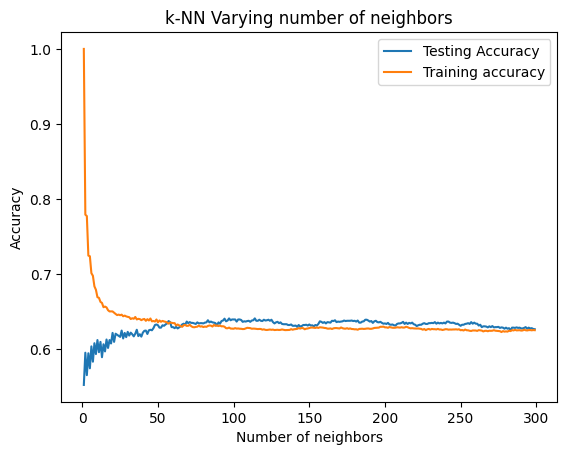

In [164]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

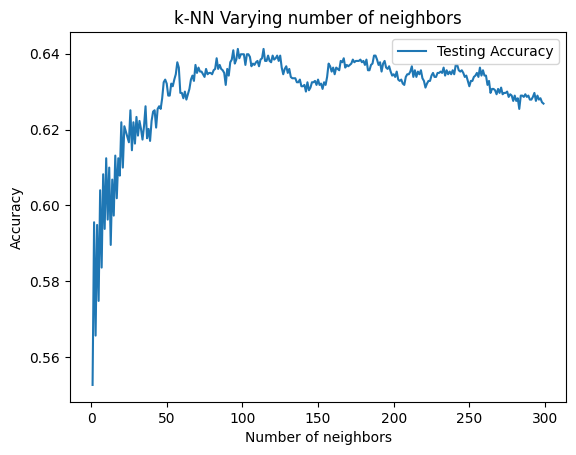

In [165]:
#Generate plot para ver cual es el mejor accuracy
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
#plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [184]:
knn = KNeighborsClassifier(n_neighbors=123)

In [185]:
# * Seteamos la configuración de nuestro modelo
# *en este caso trabajaremos con los n vecinos más cercanos del gráfico
knn = KNeighborsClassifier(n_neighbors=123)
knn.fit(X_train, y_train)
display(knn.score(X_test, y_test))

0.6394940267041461

In [186]:

# * Fit the model

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=123)

In [187]:

# * Obtenemos el accuracy. Nota: En el caso de algoritmos de clasificación el método de score representa el accuracy.

knn.score(X_test,y_test)

0.6394940267041461

In [188]:
# * Importamos confusion_matrix

from sklearn.metrics import confusion_matrix

In [189]:
# * obtengamos las predicciones usando el clasificador que ajustamos arriba
#* yo tengo mi modelo entrenado y siempre evalúo sobre mi data de testeo

y_pred = knn.predict(X_test)

In [190]:
confusion_matrix(y_test,y_pred)

array([[1558,  231],
       [ 795,  262]], dtype=int64)

In [191]:
#* ya si quieres mejorar la presentación de la matriz de confusión usas el siguiente código
#* siempre recuerda que lo que nos importa es la diagonal principal
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,1558,231,1789
1,795,262,1057
All,2353,493,2846


In [192]:
# * import classification_report

from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

In [193]:
#*0 es negativos y 1 positivos, nos interesan los positivos
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.87      0.75      1789
           1       0.53      0.25      0.34      1057

    accuracy                           0.64      2846
   macro avg       0.60      0.56      0.55      2846
weighted avg       0.61      0.64      0.60      2846



In [194]:
from sklearn.metrics import roc_curve

In [195]:
#* Calculo de los parametros para mi curva ROC 

y_pred_proba = knn.predict_proba(X_test)
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

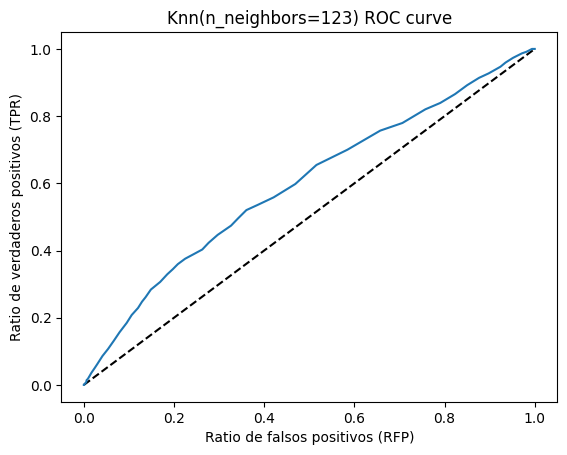

In [197]:
# * CURVA ROC

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('Ratio de falsos positivos (RFP)')
plt.ylabel('Ratio de verdaderos positivos (TPR)')
plt.title('Knn(n_neighbors=123) ROC curve')
plt.show()

In [198]:
# * Area under ROC curve (ROC AUC), nos indica el accuracy, un modelo correcto con buena predicción 

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.5956801075425191